In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up visualisation settings
plt.style.use('ggplot')
sns.set(style='whitegrid')

In [2]:
# Load the data
data_path = 'E:/Data Science Project/Unified Mentor Project/Intership Project/Project_1 Analyzing Amazon Sales data/Amazon Sales data.csv'
amazon_sales_data = pd.read_csv(data_path)

# Display the first few rows of the dataset
amazon_sales_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [3]:
# Display the structure of the dataset
amazon_sales_data.info()

# Display basic statistics of the dataset
amazon_sales_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [4]:
# Checking for missing values
missing_values = amazon_sales_data.isnull().sum()
print(missing_values)

# Displaying rows with missing values (if any)
rows_with_missing_values = amazon_sales_data[amazon_sales_data.isnull().any(axis=1)]
print(rows_with_missing_values)

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64
Empty DataFrame
Columns: [Region, Country, Item Type, Sales Channel, Order Priority, Order Date, Order ID, Ship Date, Units Sold, Unit Price, Unit Cost, Total Revenue, Total Cost, Total Profit]
Index: []


C:\Users\heman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


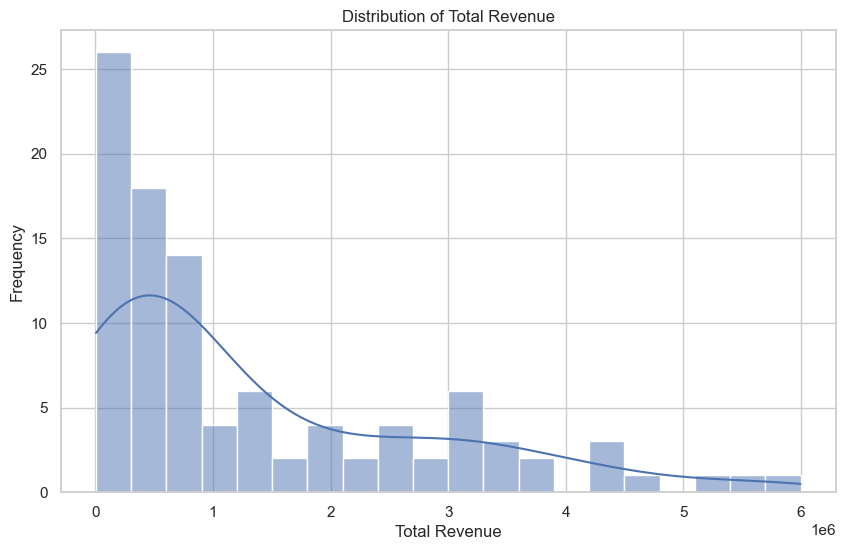

count    1.000000e+02
mean     1.373488e+06
std      1.460029e+06
min      4.870260e+03
25%      2.687212e+05
50%      7.523144e+05
75%      2.212045e+06
max      5.997055e+06
Name: Total Revenue, dtype: float64

In [5]:
# Convert Order Date and Ship Date to datetime format
amazon_sales_data['Order Date'] = pd.to_datetime(amazon_sales_data['Order Date'], format='%m/%d/%Y')
amazon_sales_data['Ship Date'] = pd.to_datetime(amazon_sales_data['Ship Date'], format='%m/%d/%Y')

# Distribution of Total Revenue
plt.figure(figsize=(10, 6))
sns.histplot(amazon_sales_data['Total Revenue'], kde=True, bins=20)
plt.title('Distribution of Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.show()

# Numerical output of the distribution
amazon_sales_data['Total Revenue'].describe()

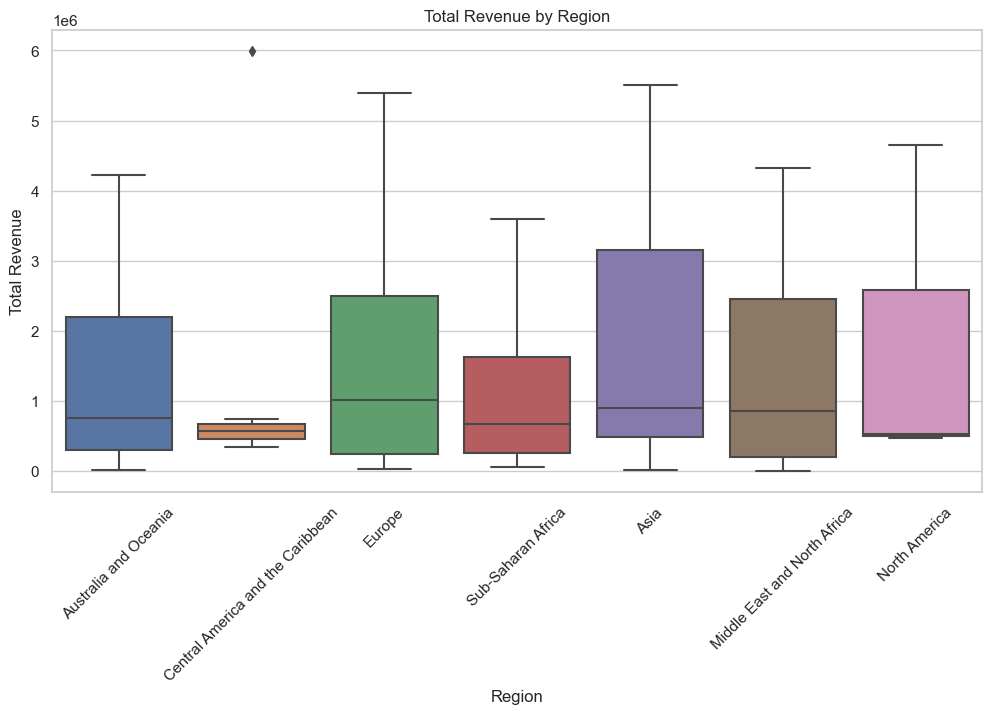

                                   count          mean           std  \
Region                                                                 
Asia                                11.0  1.940645e+06  1.903001e+06   
Australia and Oceania               11.0  1.281297e+06  1.348356e+06   
Central America and the Caribbean    7.0  1.310055e+06  2.071219e+06   
Europe                              22.0  1.516770e+06  1.548707e+06   
Middle East and North Africa        10.0  1.405271e+06  1.513936e+06   
North America                        3.0  1.881119e+06  2.395602e+06   
Sub-Saharan Africa                  36.0  1.102001e+06  1.080739e+06   

                                         min          25%          50%  \
Region                                                                   
Asia                                19103.44  487755.3250   902980.640   
Australia and Oceania               20404.71  292660.4750   759202.720   
Central America and the Caribbean  339490.50  455404.88

In [6]:
# Total Revenue by Region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Total Revenue', data=amazon_sales_data)
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# Numerical output of Total Revenue by Region
total_revenue_by_region = amazon_sales_data.groupby('Region')['Total Revenue'].describe()
print(total_revenue_by_region)

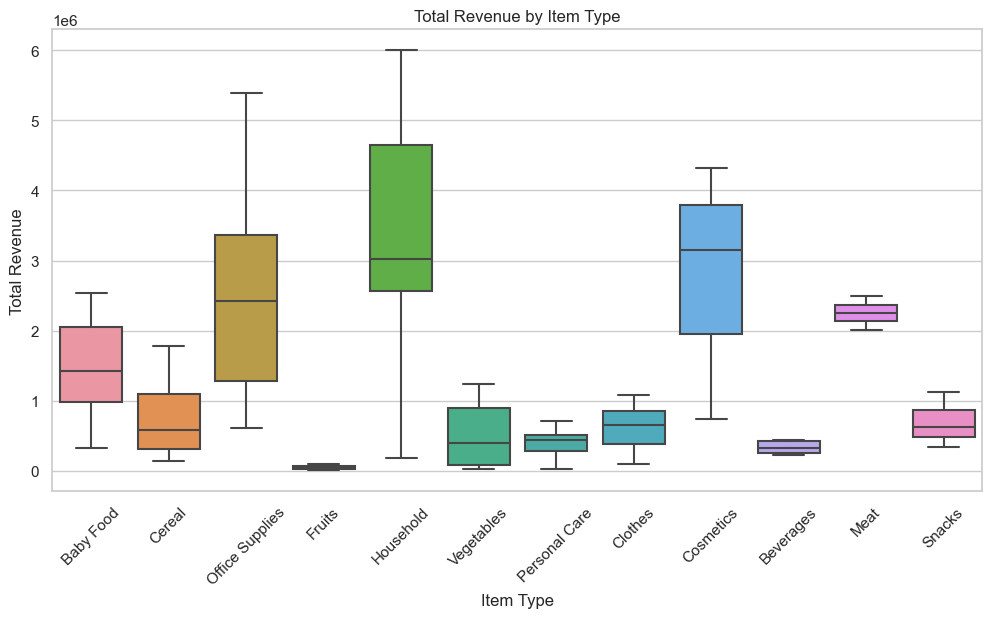

                 count          mean           std         min           25%  \
Item Type                                                                      
Baby Food          7.0  1.478618e+06  7.888722e+05   324971.44  9.858914e+05   
Beverages          8.0  3.363493e+05  9.663111e+04   221117.00  2.540236e+05   
Cereal             7.0  7.604141e+05  6.112253e+05   140287.40  3.166752e+05   
Clothes           13.0  5.990225e+05  3.064421e+05    97040.64  3.805130e+05   
Cosmetics         13.0  2.815501e+06  1.244931e+06   745426.00  1.957344e+06   
Fruits            10.0  4.664813e+04  2.924026e+04     4870.26  2.412971e+04   
Household          9.0  3.321079e+06  1.856528e+06   188452.14  2.559474e+06   
Meat               2.0  2.251838e+06  3.403846e+05  2011149.63  2.131494e+06   
Office Supplies   12.0  2.548782e+06  1.484553e+06   617347.08  1.276697e+06   
Personal Care     10.0  3.980905e+05  1.992772e+05    22312.29  2.849516e+05   
Snacks             3.0  6.935778e+05  3.

In [7]:
# Total Revenue by Item Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Item Type', y='Total Revenue', data=amazon_sales_data)
plt.title('Total Revenue by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# Numerical output of Total Revenue by Item Type
total_revenue_by_item_type = amazon_sales_data.groupby('Item Type')['Total Revenue'].describe()
print(total_revenue_by_item_type)

C:\Users\heman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\heman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


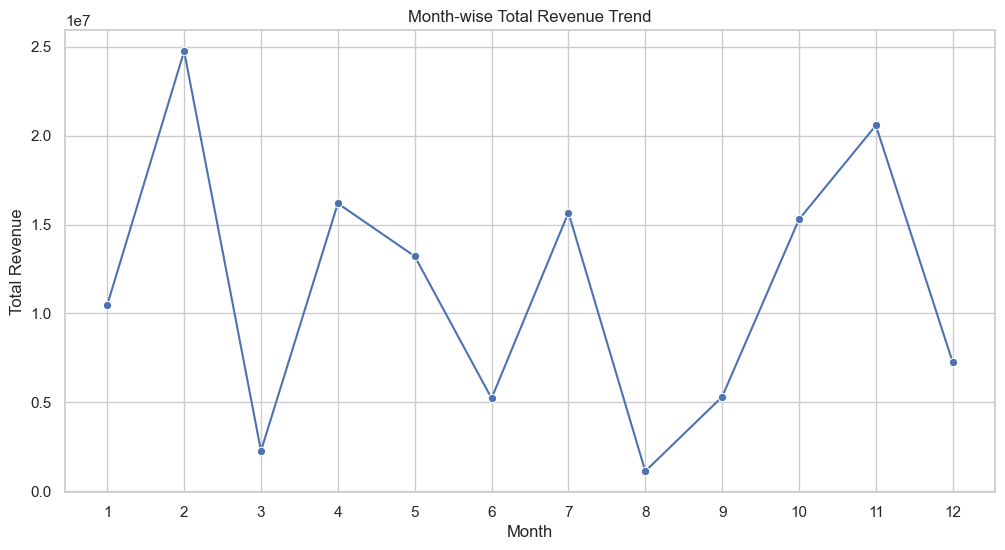

Order Month
1     10482467.12
2     24740517.77
3      2274823.87
4     16187186.33
5     13215739.99
6      5230325.77
7     15669518.50
8      1128164.91
9      5314762.56
10    15287576.61
11    20568222.76
12     7249462.12
Name: Total Revenue, dtype: float64


In [8]:
# Extract month and year from Order Date
amazon_sales_data['Order Month'] = amazon_sales_data['Order Date'].dt.month
amazon_sales_data['Order Year'] = amazon_sales_data['Order Date'].dt.year

# Month-wise Sales Trend
plt.figure(figsize=(12, 6))
monthly_revenue = amazon_sales_data.groupby('Order Month')['Total Revenue'].sum()
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o')
plt.title('Month-wise Total Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13))
plt.show()

# Numerical output of month-wise revenue
print(monthly_revenue)

C:\Users\heman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\heman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


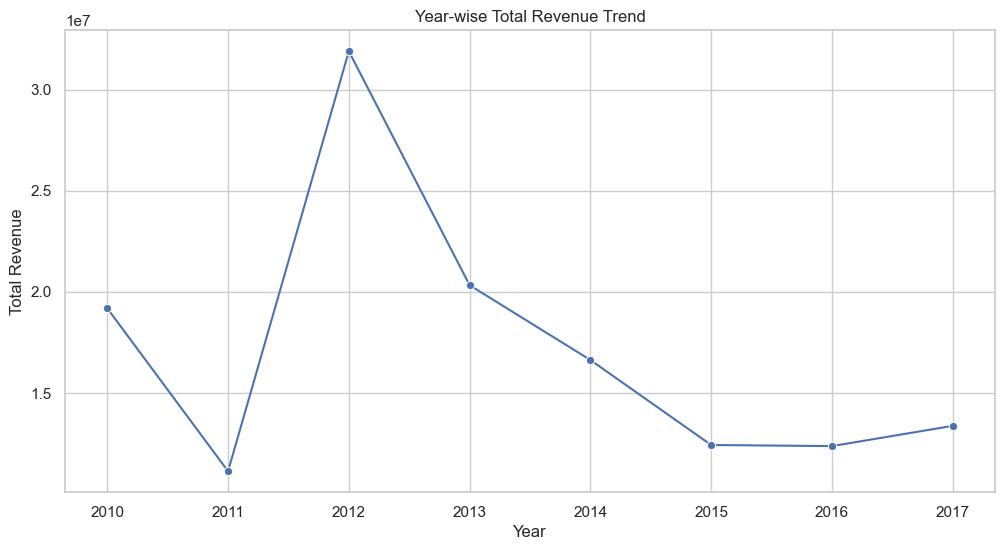

Order Year
2010    19186024.92
2011    11129166.07
2012    31898644.52
2013    20330448.66
2014    16630214.43
2015    12427982.86
2016    12372867.22
2017    13373419.63
Name: Total Revenue, dtype: float64


In [9]:
# Year-wise Sales Trend
plt.figure(figsize=(12, 6))
yearly_revenue = amazon_sales_data.groupby('Order Year')['Total Revenue'].sum()
sns.lineplot(x=yearly_revenue.index, y=yearly_revenue.values, marker='o')
plt.title('Year-wise Total Revenue Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

# Numerical output of year-wise revenue
print(yearly_revenue)

<Figure size 1200x600 with 0 Axes>

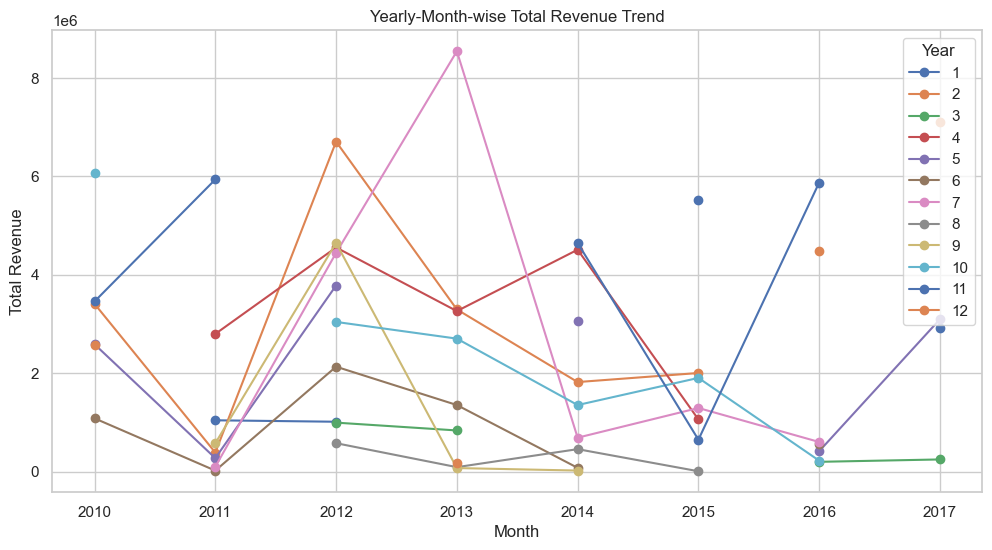

Order Month          1           2          3           4           5   \
Order Year                                                               
2010                NaN  3410661.12        NaN         NaN  2587973.26   
2011         1042225.35   387002.20        NaN  2798046.49   272410.45   
2012         1012884.00  6707849.42  994765.42  4556012.38  3782781.82   
2013                NaN  3296425.02  835759.10  3262562.10         NaN   
2014                NaN  1819660.25        NaN  4510578.10  3060338.59   
2015         5513227.50  2003911.12        NaN  1059987.26         NaN   
2016                NaN         NaN  197883.40         NaN   414371.10   
2017         2914130.27  7115008.64  246415.95         NaN  3097864.77   

Order Month          6           7          8           9           10  \
Order Year                                                               
2010         1082418.40         NaN        NaN         NaN  6064933.75   
2011           19103.44    97040.64  

In [10]:
# Yearly-Month-wise Sales Trend
plt.figure(figsize=(12, 6))
year_month_revenue = amazon_sales_data.groupby(['Order Year', 'Order Month'])['Total Revenue'].sum().unstack()
year_month_revenue.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Yearly-Month-wise Total Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.legend(title='Year')
plt.show()

# Numerical output of yearly-month-wise revenue
print(year_month_revenue)
